<h1>Insertion Sort Analysis</h1>
Using Itertools and a random permutation generator

<h5>Alberto Nicolai Romero Martínez - C.C.1031179247</h5>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random
import math
import itertools
from itertools import *
import sys

In [2]:
def insertion_sort(array):    
    for j in range(1, len(array)):    
        item = array[j]
        i = j - 1     
        while( i > -1) and (array[i] > item):
            array[i+1] = array[i]
            i-=1       
        array[i+1] = item    
    return array

In [3]:

def swap(v,i,j):
    t = v[i]
    v[i] = v[j]
    v[j] = t  
            
def randomPerm(n):
    v=[]
    for i in range(n):
        v.append(i+1)
    for i in range(len(v)-1):
        j = random.randint(i, len(v)-1)
        swap(v,i,j)
    return v
        
        
def isort_steps(l): 
    comp = 0
    time = 0
    swaps = 0
    whileq = 0
    v = []   
    
    for i in l:
        v.append(i)
        
    for i in range(len(v)):    
        x = v[i]
        j = i-1
        
        while (j > -1) and (v[j] > x):
            v[j+1] = v[j]
            j-=1
            swaps+= 1
            time+=3
            comp+=1  
            whileq+=1
            
        time+=1
        whileq+=1
        if j != -1: comp+=1
        
        
        v[j+1] = x
        time+=4
   
    
    time+=1
    return comp,time,swaps, whileq




In [4]:
def using_itertools():
    print "Using itertools permutation function\n"
    print "Capacity of memory needed for each permutation"
    for i in range(1,11):
        print i , math.factorial(i) * i *  sys.getsizeof(i), "Bytes"
    
    avg = { "t": [0], "c": [0],"w": [0],"s": [0]} 
    hst = { "t": [], "c": [],"w": [],"s": []} 
    for i in range(1,11):            
        data = { "t": [], "c": [],"w": [],"s": []} 
        x = permutations(range(1,i));
        for i in x:
            c, t, s, w = isort_steps(list(i))
            data["t"].append(t)
            data["c"].append(c)
            data["w"].append(w)
            data["s"].append(s)
            
        avg["t"].append(np.mean(data["t"]))
        avg["c"].append(np.mean(data["c"]))
        avg["w"].append(np.mean(data["w"]))
        avg["s"].append(np.mean(data["s"]))
        
        hst["t"].append((data["t"]))
        hst["c"].append((data["c"]))
        hst["w"].append((data["w"]))
        hst["s"].append((data["s"]))
    
    plt.plot(avg["t"])
    plt.plot(avg["c"])
    plt.plot(avg["w"])
    plt.plot(avg["s"])
    plt.xlabel('Permutation size (n)')
    plt.ylabel('Instructions')
    plt.legend(['Instructions', 'Comparisons', 'While questions', 'Swaps' ])
    plt.xlim(0,10)
    plt.ylim(0,avg["t"][10])
    
    plt.show()
    plt.close()
 
    plt.subplot(2, 1, 1)
    plt.hist(np.array(hst["t"][len(hst["t"]) -1]    ), 100   )

    plt.xlabel("N of instructions")
    plt.ylabel('Frequence')
    plt.legend(['Instructions' ])   
  
    plt.subplot(2, 1, 2)
    plt.hist(np.array(hst["c"][len(hst["c"]) -1]    ), 100   )

    plt.xlabel("N of instructions")
    plt.ylabel('Frequence')
    plt.legend(['Comparisons' ])
    
    plt.show()
    plt.close()
      
    plt.subplot(2, 1, 1)
    plt.hist(np.array(hst["w"][len(hst["w"]) -1]    ), 100   )

    plt.xlabel("N of instructions")
    plt.ylabel('Frequence')
    plt.legend([ 'While questions' ])
     
    plt.subplot(2, 1, 2)
    plt.hist(np.array(hst["s"][len(hst["s"]) -1]    ), 100 )

    plt.xlabel("N of instructions")
    plt.ylabel('Frequence')
    plt.legend(['Swaps' ])    
    
    plt.show()
    plt.close()

In [5]:
def generate_perm(n):
    v = []
    for _ in range(1000):
        v.append(randomPerm(n))
    return v

def using_random_perm():
    print "Using random permutations generation\n"  

    avg = { "t": [0], "c": [0],"w": [0],"s": [0]} 
    hst = { "t": [], "c": [],"w": [],"s": []} 
    for i in range(1,50):            
        data = { "t": [], "c": [],"w": [],"s": []} 
        x = generate_perm(i);
        for i in x:
            c, t, s, w = isort_steps(list(i))
            data["t"].append(t)
            data["c"].append(c)
            data["w"].append(w)
            data["s"].append(s)
            
        avg["t"].append(np.mean(data["t"]))
        avg["c"].append(np.mean(data["c"]))
        avg["w"].append(np.mean(data["w"]))
        avg["s"].append(np.mean(data["s"]))
        
        hst["t"].append((data["t"]))
        hst["c"].append((data["c"]))
        hst["w"].append((data["w"]))
        hst["s"].append((data["s"]))
    
    plt.plot(avg["t"])
    plt.plot(avg["c"])
    plt.plot(avg["w"])
    plt.plot(avg["s"])
    plt.xlabel('Permutation size (n)')
    plt.ylabel('Instructions')
    plt.legend(['Instructions', 'Comparisons', 'While questions', 'Swaps' ])
    plt.xlim(0,50)
    plt.ylim(0,avg["t"][49])
    
    
    plt.show()
    plt.close()
    
    plt.subplot(2, 1, 1)
    plt.hist(np.array(hst["t"][len(hst["t"]) -1]    )  ,100 )

    plt.xlabel("N of instructions")
    plt.ylabel('Frequence')
    plt.legend(['Instructions' ])   
  
    plt.subplot(2, 1, 2)
    plt.hist(np.array(hst["c"][len(hst["c"]) -1]    ),100   )

    plt.xlabel("N of instructions")
    plt.ylabel('Frequence')
    plt.legend(['Comparisons' ])
    

    plt.show()
    plt.close()
    
    plt.subplot(2, 1, 1)
    plt.hist(np.array(hst["w"][len(hst["w"]) -1]    )  ,100)

    plt.xlabel("N of instructions")
    plt.ylabel('Frequence')
    plt.legend([ 'While questions' ])
    
    
    plt.subplot(2, 1, 2)
    plt.hist(np.array(hst["s"][len(hst["s"]) -1]    ) ,100   )

    plt.xlabel("N of instructions")
    plt.ylabel('Frequence')
    plt.legend(['Swaps' ])    
    
    plt.show()
    plt.close()    

Using itertools permutation function

Capacity of memory needed for each permutation
1 24 Bytes
2 96 Bytes
3 432 Bytes
4 2304 Bytes
5 14400 Bytes
6 103680 Bytes
7 846720 Bytes
8 7741440 Bytes
9 78382080 Bytes
10 870912000 Bytes


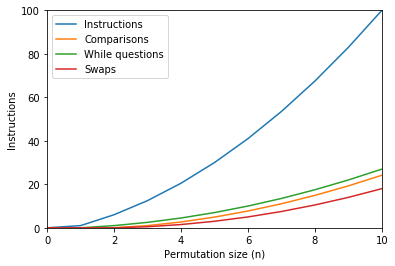

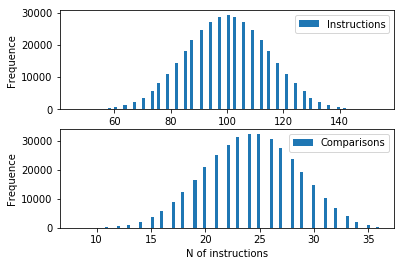

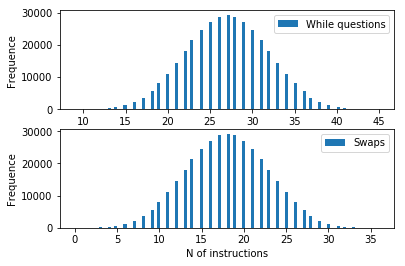

In [6]:
using_itertools()

Using random permutations generation



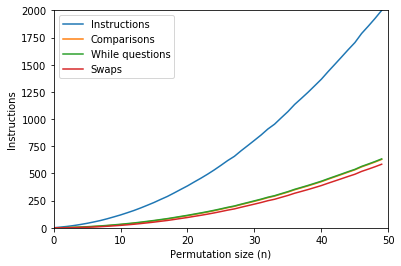

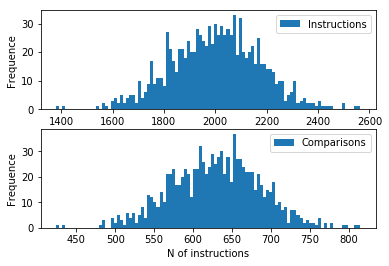

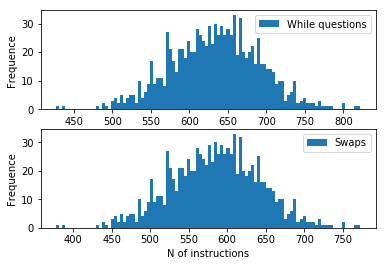

In [7]:
using_random_perm()